# 树回归

**主要内容**
> CART算法

> 回归树与模型树

> 树剪枝算法

> Python中GUI的使用

线性回归含有一些强大的方法，但这些方法创建的模型需要拟合所有的样本点（局部加权线性回归除外）。当数据拥有众多特征且特征之间关系十分复杂时，构建全局模型的想法就显得困难且笨拙。实际中很多问题都是非线性的，被=不可能使用全局线性模型来拟合任何数据。

一种可行的方法是**将数据集切分成很多易于建模的数据，然后利用线性回归技术来建模**。

## 1 复杂数据的局部建模

**分类与回归树(classification and regression tree, CART)**模型同样由特征选择、树的生成和剪枝组成，既可以用于分类也可用于回归。

前面利用决策树来进行分类。决策树不断将数据切分成小数据集，直到所有目标变量完全相同或者数据不能再切分为止。决策树是一种**贪心算法**，要在给定时间内做出最佳选择，但并不关心能否达到全局最优。

ID3的做法是每次选取当前最佳的特征来分割数据，并按照该特征的所有可能取值来切分。也就是说，如果一个特征有4个取值，那么数据将被切为4份。一旦按某种特征切分后，该特征在之后的算法执行过程中将不会再起作用，所有有观点认为**这种切分方式过于迅速**。另外一种方法是**二元切分发**，即每次把数据集切成两份。如果数据的某个特征值等于切分所要求的值，那么这些数据就进入树的左子树，反之进入右子树。

除切分过于迅速外，ID3还有一个问题，它**不能直接处理连续型特征**。只有事先将连续型数值转换成离散型，才能使用ID3算法。但这种**转换过程会破坏连续型变量的内在性质**。而使用二元切分法则易于对树构建过程进行调整以处理连续性特征。**具体做法**：如果特征值大于给定的给定值就走左子树，否则就走右子树。另外，二元切分法也节省了树的构建时间，这点意义不大，因为这些树的构建一般是离线完成，时间并非重点关注的因素。

<span style="color:red">树回归</span>
- **优点**：可以对复杂和非线性的数据建模
- **缺点**：结果不易理解
- **适用数据类型**：数值型和标称型数据

<span style="color:red">树回归的一般方法</span>
1. 收集数据：采用任意方法
2. 准备数据：需要数值型的数据，标称型数据应该映射成二值型数据
3. 分析数据：会出数据的二维可视化显示结果，以字典方式生成树
4. 训练算法：大部分时间都花在叶节点树模型的构建上
5. 测试算法：使用测试数据上的$R^2$值来分析模型结果
6. 使用算法：使用训练出的树做预测，预测结果还可以用来做很多事情

## 2 CART算法

CART是在给定输入随机变量$X$条件下输出随机变量$Y$的条件概率分布的学习方法。CART假设决策树是二叉树，内部节点特征的取值为“是”和“否”，左分支是取值为“是”的分支，右子树是取值为“否”的分支。这样的决策树等价于递归地二分每个特征，将输入空间即特征空间划分为有限个单元，并在这些单元上确定预测的概率分布，也就是在输入给定的条件下输出的条件概率分布。

<span style="color:red">CART算法由以下两步组成：</span>
1. **决策树的生成**：基于训练数据集生成决策树，生成的决策树要尽量大；
2. **决策树剪枝**：用验证数据集对生成的树进行剪枝并选择最优子树，这时用损失函数最小作为剪枝的标准.

决策树的生成就是递归地构建二叉决策树的过程。对回归树用**平方误差最小化准则**，对分类树用**基尼指数(Gini index)最小化准则**，进行特征先择，生成二叉树。

<span style="color:red">回归树的生成</span>

假设$X$与$Y$分别作为输入和输出变量，并且$Y$时连续变量，给定训练数据集$$D = \left\{(x_1,y_1), (x_2,y_2), \cdots, (x_N, y_N)\right\}$$

考虑如何生成回归树。

一个回归树对应着输入空间（即特征空间）的一个划分以及在划分的单元上的输出值。假设已将输入空间划分为$M$个单元$R_1, R_, \cdots, R_M$，并且在每个单元$R_m$上有一个固定的输出值$c_m$，于是回归树的模型可表示为
$$f(x) = \sum_{m=1}^Mc_mI(x\in R_m)$$

当输入空间的划分确定时，可以用**平方误差**$\sum_{x_i\in R_m}(y_i-f(x_i))^2$来表示回归树对于训练数据集的预测误差，用平方误差最小的准则求解每个单元上的最优输出值。易知，单元$R_m$上的$\hat{c_m}$的最优值$m$是$R_m$上的所有输出实例$x_i$对应的输出$y_i$的均值，即
$$\hat{c_m} = ave(y_i|x_i \in R_m)$$

问题是怎么**对输入空间进行划分**。这里**采用启发式的方法**，选择第$j$个变量$x^{(j)}$和它的取值$s$，作为切分变量(splitting variable)和切分点(splitting point)，并定义两个区域：
$$R_1(j,s) = \left\{x|x^{(j)}\leq s\right\}和R_2(j,s) = \left\{x|x^{(j)}>s\right\}$$

然后寻找最优切分变量$j$和最优切分点$s$.具体地，求解：

$$min_{j,s}\left[min_{c_1}\sum_{x_i\in R_1(j,s)}(y_i-c_1)^2 + min_{c_2}\sum_{x_i\in R_2(j,s)}(y_i-c_2)^2\right]$$

对固定输入变量$j$可以找到最优切分点$s$.
$$\hat{c_1} = ave\left(y_i|x_i\in R_1(j,s)\right)和\hat{c_1} = ave(y_i|x_i\in R_1(j,s))$$

遍历所有输入变量，找到最优地切分变量$j$，构成一个对$(j,s)$$.依此将输入空间划分成两个区域。接着，对每个区域重复上述过程，直到满足条件为止。这样生成一棵回归树。这样地回归树通常称为**最小二乘回归树(least squares regression tree)**，算法如下：

<span style="color:red">最小二乘树算法</span>

+ **输入**：训练数据集D
+ **输出**：回归树$f(x)$

在训练数据集所在的输入空间中，递归地将每个区域划分为两个子区域并决定每个子区域上的输出值，构建二叉决策树：
1. 选择最优切分变量$j$和切分点$s$，求解
$$min_{j,s}\left[min_{c_1}\sum_{x_i\in R_1(j,s)}(y_i-c_1)^2 + min_{c_2}\sum_{x_i\in R_2(j,s)}(y_i-c_2)^2\right]$$
遍历变量$j$，对固定的切分变量$j$扫描切分点$s$，选择使上式达到最小值的对$(j, s)$.
2. 用选定的对$(j, s)$划分区域并决定相应的输出值：
  $$R_1(j,s) = \left\{x|x^{(j)}\leq s\right\}，R_2(j,s) = \left\{x|x^{(j)}>s\right\}$$
  
  $$\hat{c_m} = \frac{1}{N_m}\sum_{x_i\in R_m(j,s)}y_i, x\in R_m, m=1,2$$
3. 继续对两个子区域调用步骤1，2，直到停止条件
4. 将输入空间划分为$M$个区域$R_1, R_2, \cdots, R_M$，生成决策树：
$$f(x) = \sum_{m=1}^M \hat{c_m}I(x\in R_m)$$

## 3 连续和离散型特征的树的构建（CART算法用于回归）

这里使用一部字典来存储树的数据结构，该字典包含以下4个元素：
> 待切分的特征

> 带切分的特征值

> 右子树。当不需要切分的时候，也可以是单值

> 左子树。与右子树类似

    CART算法只做二元切分，所以这里可以固定树的数据结构。树包含左键和右键，可以存储另一棵子树或单个值。字典还包含特征和特征值这两个键，他们给出切分算法所有的特征和特征值。

<span style="color:red">函数`createTree()`的伪代码</span>
```
找到最佳的带切分特征：
    如果该节点不能再分，将该节点存为叶节点
    执行二元切分
    在右子树调用createTree()方法
    在左子树调用createTree()方法
```

In [1]:
import numpy as np

In [2]:
def loadDataSet(fileName):
    '''General function to parse tab-delimited floats.
    Assume laset colum is target value.
    '''
    dataMat = []
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.rstrip().split('\t')
        fltLine = map(float, curLine)  # map all elements to float()
        dataMat.append(fltLine)
    return np.mat(dataMat)  # np.matrix

> 该函数读取一个以tab键为分隔符的文件，然后将每行的内容保存成一组浮点数。

In [3]:
def binSplitDataSet(dataSet, feature, value):
    '''Split dataSet in two subclass according to given feature and value.
    Args:
        dataSet: data set, arrar_like
        feature: split
        value: the value of feature to do the split
    Returns:
        two subclasses
    '''
    # more than value
    mat0 = dataSet[np.nonzero(dataSet[:, feature] > value)[0], :]
    # less than or equal to value
    mat1 = dataSet[np.nonzero(dataSet[:, feature] <= value)[0], :]
    return mat0, mat1

> 在给定特征和特征值的情况下，该函数通过数组过滤方式将上述数据集合切分得到两个子集并返回。

回归树假设叶节点是常数值，这种策略认为数据中的复杂关系可以用树结构来概括。为成功构建以分段函数为叶节点的树，需要度量出数据的一致性。如何**计算连续性数值的混乱度**呢？首先计算所有数据的均值，然后计算每条数据的值到均值的差值。为了正负差值同等看待，一般使用绝对值或平方值来代替上述差值。这里需要的是平方误差的总值（总方差）。总方差可以通过均方差乘以数据集中样本点的个数来得到。

In [4]:
def regLeaf(dataSet):
    '''Generate leaf node.Returns the value used for each leaf.'''
    return np.mean(dataSet[:, -1])

> 负责生成叶节点。当chooseBestSplit()函数确定不再对数据进行切分时，将调用该函数来得到叶节点的模型。在回归树中，该模型其实就是目标变量的均值。

In [5]:
def regErr(dataSet):
    '''Calculate the square error of target variable on the given dataset.'''
    return np.var(dataSet[:, -1]) * np.shape(dataSet)[0]

> 该函数在给定数据集上计算目标变量的平方误差。需要返回的是总方差，所以要用均方差乘以数据集中样本的个数。

<span style="color:red">函数`chooseBestSplit()`的伪代码</span>
```
对每个特征
    对每个特征值
        将数据集切分成两份
        计算切分的误差
        如果当前误差小于当前最小误差，那么将当前切分定为最佳切分并更新最小误差
返回最佳切分的特征和阈值
```

In [6]:
def chooseBestSplit(dataSet, leafType=regLeaf, errType=regErr, ops=(1, 4)):
    '''Find the best feature and value to split dataSet.'''
    # parameters pointed by user
    tolS = ops[0]  # tolerant error decrease
    tolN = ops[1]  # minimun sample size
    # if all the target variables are the same value: quit and return value
    if len(set(dataSet[:, -1].T.tolist()[0])) == 1:  # exit condition 1
        return None, leafType(dataSet)
    m, n = np.shape(dataSet)
    # the choice of the best feature is driven by
    # Reduction in RSS(residual sum of squares) error from mean
    S = errType(dataSet)
    bestS = np.inf  # error
    bestIndex = 0  # the best feature to split
    bestValue = 0  # the corresponding value
    for featIndex in range(n-1):  # traverse every feature
        for splitVal in set(dataSet.A[:, featIndex]):  # every value of feature
            mat0, mat1 = binSplitDataSet(dataSet, featIndex, splitVal)  # split
            # if the size of some subclass is less than tolN don't do the split
            if (mat0.shape[0] < tolN) or (mat1.shape[0] < tolN):
                continue  # jump out of this loop
            newS = errType(mat0) + errType(mat1)
            if newS < bestS:
                bestIndex = featIndex
                bestValue = splitVal
                bestS = newS
    # if the decrease (S-bestS) is less than a threshold(tolS)
    # don't do the split
    if (S - bestS) < tolS:
        return None, leafType(dataSet)  # exit condition 2
    # split dataSet according to bestIndex and bestValue
    mat0, mat1 = binSplitDataSet(dataSet, bestIndex, bestValue)
    # if the size of some subclass is less than tolN, don't do the split
    # if (mat0.shape[0] < tolN) or (mat1.shape[0] < tolN):  # I think
    # return None, leafType  # exit condition 3  # this for-loop is redundant
    # returns the best feature to split on and the value used for that split
    return bestIndex, bestValue

> 构建回归树的核心函数。该函数目的是找到数据的最佳二元切分方式（即切分后能达到最低误差的切分）。如果找不到一个‘好’的二元切分，该函数返回None并同时调用createTree()函数产生叶节点，叶节点的值也将返回None。在函数中有3种情况不会切分（第3种被我注释掉了，因为在for循环中执行了，没必要在循环外再执行一次———我的想法），将直接创建叶节点。如果找到‘好’的切分方式，则返回特征编号和切分特征值。

> 函数会统计不同剩余特征值的数目，如果该数目为1， 那么就不需要再切分而直接返回。

> ops设定的tolN和tolN，是用户指定的参数，用于控制函数的停止时机。tolS:是容许的误差下降值，即切分数据集后效果提升的不够大，那么就不该进行切分操作而直接创建叶节点。tolN:是切分的最少样本数，即切分后的某个数据子集大小小于用户该值，那么也不应该切分。

In [7]:
def createTree(dataSet, leafType=regLeaf, errType=regErr, ops=(1, 4)):
    '''Assume the dataSet is Numpy so we can array filtering.'''
    # choose the best split
    feat, val = chooseBestSplit(dataSet, leafType, errType, ops)
    # if the splitting hit a stop condition return val
    if feat is None:
        return val
    retTree = {}
    retTree['spInd'] = feat
    retTree['spVal'] = val
    lSet, rSet = binSplitDataSet(dataSet, feat, val)  # split
    retTree['left'] = createTree(lSet, leafType, errType, ops)
    retTree['right'] = createTree(rSet, leafType, errType, ops)
    return retTree

> 是一个递归函数。满足停止条件，chooseBestSplit()将返回None和某类模型的值。如果构建的是回归树，该模型是一个常数；如果是模型树，其模型是一个线性方程。不满足递归条件，在切分的数据子集上递归调用createTree().

In [8]:
mydata1 = loadDataSet('ex00.txt')
createTree(mydata1)

{'left': 1.0180967672413792,
 'right': -0.044650285714285719,
 'spInd': 0,
 'spVal': 0.48813000000000001}

In [9]:
mydata2 = loadDataSet('ex0.txt')
createTree(mydata2)

{'left': {'left': {'left': 3.9871631999999999,
   'right': 2.9836209534883724,
   'spInd': 1,
   'spVal': 0.79758300000000004},
  'right': 1.980035071428571,
  'spInd': 1,
  'spVal': 0.58200200000000002},
 'right': {'left': 1.0289583666666666,
  'right': -0.023838155555555553,
  'spInd': 1,
  'spVal': 0.19783400000000001},
 'spInd': 1,
 'spVal': 0.39434999999999998}

回归树的构建已完成，但是需要某种措施来检查构建过程中是否得当。通过**树剪枝(tree pruning)**技术，来通过对决策树剪枝来达到更好的预测效果。

## 4 树剪枝

决策树生成算法递归地产生决策树，直到不能继续下去为止。这样产生的树往往对训练数据集的分类很准确，对未知数据的测试数据集却没有那么准确，即出现**过拟合**现象。**过拟合的原因**在于学习过多地考虑如何提高对训练数据的正确性，从而构建了复杂的树。解决办法是考虑决策树的复杂度，对以生成的决策树进行简化。

通过降低决策树的复杂度来避免过拟合的过程称为**剪枝(pruning)**。具体地讲，剪枝从以生成的树上裁掉一些子树或叶节点，并将其根节点或父节点做为新的叶节点，从而简化分类树模型。

在函数`chooseBestSplit()`中提前终止条件，实际上是进行一种所谓的**预剪枝(prepruning)**操作。另一种形式的剪枝需要使用测试集和训练集，称作为**后剪枝(postpruning)**.

**预剪枝**

可以不断修改tolS、tolN来得到合理结果，但这并不是好的办法。事实上，我们常常甚至不确定到底需要寻找什么样的结果。

由于后剪枝不需要用户指定参数，后剪枝是一个更理想化的剪枝方法。

**后剪枝**

使用后剪枝方法需要将数据集分成测试集和训练集。首先指定参数，使得构建出的树足够大、足够复杂，便于剪枝。接下来从上而下找到叶节点，用测试集来判断将这些叶节点合并是否能降低测试误差。如果是的话就合并。

<span style="color:red">函数`pruning()`的伪代码</span>
```
基于已有的树切分测试数据：
    如果存在任一子集是一棵树，则在该子集递归剪枝过程
    计算将当前两个叶节点合并后的误差
    计算不合并的误差
    如果合并会降低误差的话，就将叶节点合并
```

In [10]:
def isTree(obj):
    '''Test if obj is a tree.
    Returns: boolean
    '''
    return (type(obj).__name__ == 'dict')

> 用于测试输入变量是否是一棵树，返回布尔型。即用于判断当前处理的节点是否是叶节点。

In [11]:
def getMean(tree):
    '''Traverse tree until leafs are finded. If finded, calculate the mean.'''
    if isTree(tree['left']):
        tree['left'] = getMean(tree['left'])
    if isTree(tree['right']):
        tree['right'] = getMean(tree['right'])
    return (tree['left']+tree['right']) / 2.0

> 递归函数。从上往下遍历树直到叶节点为止。如果找到两个叶节点则计算它们的平均值。该函数对树进行塌陷处理（即返回树平均值），在pruning()函数中调用该函数时应明确这一点。

In [12]:
def pruning(tree, testData):
    '''Prune tree.
    Args:
        tree: tree to be pruned
        testData: test data set to prune
    Returns:
        a tree after pruned or mean of tree
    '''
    if testData.shape[0] == 0:  # if we have no test data collapse the tree
        return getMean(tree)
    # if the branches are not trees try to prune them
    if (isTree(tree['left']) or isTree(tree['right'])):  # have a sub-tree
        lSet, rSet = binSplitDataSet(testData, tree['spInd'], tree['spVal'])
    if isTree(tree['left']):  # if have a left sub-tree prune it
        tree['left'] = pruning(tree['left'], lSet)
    if isTree(tree['right']):  # if have a right tree prune it
        tree['right'] = pruning(tree['right'], rSet)
    # if they are both leafs, see if we can merge them
    if not isTree(tree['left']) and not isTree(tree['right']):
        lSet, rSet = binSplitDataSet(testData, tree['spInd'], tree['spVal'])
        errorNoMerge = np.sum(np.power(lSet[:, -1]-tree['left'], 2)) + \
            np.sum(np.power(rSet[:, -1]-tree['right'], 2))
        treeMean = (tree['left']+tree['right']) / 2.0
        errorMerge = np.sum(np.power(testData[:, -1]-treeMean, 2))
        if errorMerge < errorNoMerge:  # if error decrease merge them
            print('Merging!')
            return treeMean
        else:
            return tree
    else:
        return tree

> 参数：待剪枝的树与剪枝所需的测试数据。

> 函数首先要确认测试集是否为空。一旦非空，则反复递归调用函数pruning()对测试数据进行切分。 

In [13]:
mydata3 = loadDataSet('ex2.txt')
mytree = createTree(mydata3, ops=(0, 1))

In [14]:
mytestdata = loadDataSet('ex2test.txt')
pruning(mytree, mytestdata)

Merging!
Merging!
Merging!
Merging!
Merging!
Merging!
Merging!
Merging!
Merging!
Merging!
Merging!
Merging!
Merging!
Merging!
Merging!
Merging!
Merging!
Merging!
Merging!
Merging!
Merging!
Merging!
Merging!
Merging!
Merging!
Merging!
Merging!
Merging!
Merging!
Merging!
Merging!
Merging!
Merging!
Merging!
Merging!
Merging!
Merging!
Merging!
Merging!
Merging!
Merging!
Merging!
Merging!
Merging!


{'left': {'left': {'left': {'left': 92.523991499999994,
    'right': {'left': {'left': {'left': 112.386764,
       'right': 123.559747,
       'spInd': 0,
       'spVal': 0.96039799999999997},
      'right': 135.83701300000001,
      'spInd': 0,
      'spVal': 0.95851200000000003},
     'right': 111.2013225,
     'spInd': 0,
     'spVal': 0.956951},
    'spInd': 0,
    'spVal': 0.96596899999999997},
   'right': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': 96.41885225,
              'right': 69.318648999999994,
              'spInd': 0,
              'spVal': 0.94882200000000005},
             'right': {'left': {'left': 110.03503850000001,
               'right': {'left': 65.548417999999998,
                'right': {'left': 115.75399400000001,
                 'right': {'left': {'left': 94.396114499999996,
                   'right': 85.005351000000005,
                   'spInd': 0,
                   'spVal': 0.912161},
          

一般地，为了寻求最佳模型可以同时使用两种剪枝技术。

## 5 模型树

用树来对数据建模，除了把叶节点简单地为常数值为，还有一种方法是把**叶节点**设定为**分段线性函数**。这里所谓的**分段线性(piecewise linear)**)是指模型由多个线性片组成。

In [16]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


def pltData():
    data = []
    fr = open('exp2.txt')
    for line in fr.readlines():
        curLine = line.rstrip().split('\t')
        fltLine = map(float, curLine)
        data.append(fltLine)
    data = np.array(data)
    plt.scatter(data[:, 0], data[:, 1])

> 数据集exp2.txt

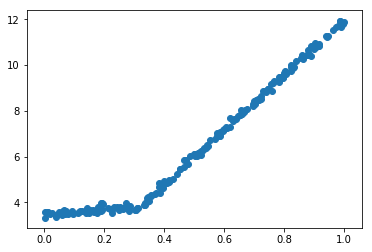

In [17]:
pltData()

> 上图可以用两个线性模型建模。

对前面的代码略作修改即可。算法的关键在于误差的计算。对于给定的数据集，应该先用线性的模型来对它进行拟合，然后计算真实的目标值与模型预测值间的差值。然后将这些差值的平方求和就得到了所需的误差。

In [18]:
def linearSolve(dataSet):
    '''Process data set to target variable Y and independent variable X.'''
    m, n = dataSet.shape
    X = np.mat(np.ones((m, n)))
    Y = np.mat(np.ones((m, 1)))
    X[:, 1:n] = dataSet[:, 0:n-1]  # independent variable
    Y = dataSet[:, -1]  # target variable
    xTx = X.T * X
    if np.linalg.det(xTx) == 0.0:
        raise NameError("This matrix is singular, cannot do inverse, \n\
                        try in creasing the second value of ops")
    ws = xTx.I * (X.T * Y)  # linear regression weights
    return ws, X, Y


def modelLeaf(dataSet):
    '''Generate model of leaf when don not need to split data set.'''
    ws, X, Y = linearSolve(dataSet)
    return ws


def modelErr(dataSet):
    '''Calculate the square error of given data set.'''
    ws, X, Y = linearSolve(dataSet)
    yHat = X * ws
    return np.sum(np.power(yHat - Y, 2))

> 第一个函数将数据集格式化成目标变量Y和自变量X。X和Y用于执行简单的线性回归。

> 第二个函数与函数regLeaf()类似，当数据不需要切分的时候它负责生成叶节点的模型。该函数在数据集上调用linearSolve()并返回回归系数ws。

> 第三个函数在给定数据集上计算误差。

In [19]:
mydata4 = loadDataSet('exp2.txt')
createTree(mydata4, modelLeaf, modelErr, (1, 10))

{'left': matrix([[  1.69855694e-03],
         [  1.19647739e+01]]), 'right': matrix([[ 3.46877936],
         [ 1.18521743]]), 'spInd': 0, 'spVal': 0.28547699999999998}

生成的两个线性模型分别是$y=3.468+1.185x$和$y=0.0016895+11.96477x$.

## 6 示例：树回归与标准回归的比较

In [20]:
# use tree regression to forecast
def regTreeEval(model, inData):  # regression tree
    return float(model)


def modelTreeEval(model, inData):  # model tree
    n = inData.shape[1]
    X = np.mat(np.ones((1, n+1)))
    X[:, 1:n+1] = inData
    return float(X*model)


def treeForecast(tree, inData, modelEval=regTreeEval):
    '''Forecast.
    Args:
        tree: tree
            got by createTree()
        inData: single data(a vector)
            value to forecast
        modelEval: regTreeEval, modelTreeEval, optional
            the kind of tree
    Returns:
        a scalar, forecasting tree
    '''
    if not isTree(tree):  # only root node
        return modelEval(tree, inData)
    if inData[tree['spInd']] > tree['spVal']:
        if isTree(tree['left']):
            return treeForecast(tree['left'], inData, modelEval)
        else:
            return modelEval(tree['left'], inData)
    else:
        if isTree(tree['right']):
            return treeForecast(tree['right'], inData, modelEval)
        else:
            return modelEval(tree['right'], inData)


def createForecast(tree, testData, modelEval=regTreeEval):
    '''Returns vector(forecasting value).'''
    m = len(testData)
    yHat = np.mat(np.zeros((m, 1)))
    for i in range(m):
        yHat[i, 0] = treeForecast(tree, np.mat(testData[i]), modelEval)
    return yHat

> 对于单个的数据点或行向量，函数treeForecast()会返回一个浮点值。在给定树的情况下，对于单个数据点，该函数会给出一个预测值。

>调用函数treeForecast()时需要指定树的类型，以便在叶节点上能够调用合适的模型。

>回归树节点进行预测，就调用函数regTreeEval()；要对模型树节点进行预测，就调用modelTreeEval()。它们会对输入数据进行格式化处理，在原始数据矩阵上增加第0列，然后计算并返回预测值。

>最后一个函数，会多次调用treeForecast()。能够以向量形式返回一组预测值，在对整个测试集进行预测时非常有用。

进行比较

In [21]:
def test():
    trainMat = loadDataSet('bikeSpeedVsIq_train.txt')  # training set
    testMat = loadDataSet('bikeSpeedVsIq_test.txt')    # testing set
    # create a regression tree
    myRegTree = createTree(trainMat, ops=(1, 20))
    yRegHat = createForecast(myRegTree, testMat[:, 0])
    print(np.corrcoef(yRegHat, testMat[:, 1], rowvar=0)[0, 1])
    # create a model tree
    myModTree = createTree(trainMat, modelLeaf, modelErr, ops=(1, 20))
    yModHat = createForecast(myModTree, testMat[:, 0], modelTreeEval)
    print(np.corrcoef(yModHat, testMat[:, 1], rowvar=0)[0, 1])
    # standard line regression
    ws, X, Y = linearSolve(trainMat)
    yHat = np.mat(np.zeros((len(testMat), 1)))
    for i in range(testMat.shape[0]):
        yHat[i] = testMat[i, 0]*ws[1, 0] + ws[0, 0]
    print(np.corrcoef(yHat, testMat[:, 1], rowvar=0)[0, 1])

In [22]:
test()

0.964085231822
0.976041219138
0.943468423567


比较哪种模型更好，一个客观的方法是计算相关系数($R^2$)，越接近1.0越好。
可以看出树回归方法在预测复杂数据时会比简单的线性模型更有效。